In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
attendance_metadata = "..\data\cleaned_data_schoolattendancerate_seifa.csv"
attendance_df = pd.read_csv(attendance_metadata)


attendance_df.head(10)

,School Code,School,Attendance Year,School Type,School Category,Remoteness Area,Region,Local Government Area,State Electorate,FTE Days Attended,Possible Attendance Days,Attendance Rate,SEIFA Territory Percentile,Official Low Year Level,Official High Year Level,Suburb,Post Code,All Student Count,Longitude,Latitude
0,591,Abercorn State School,2015,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1987.5,2103.0,94.5,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
1,591,Abercorn State School,2016,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1632.5,1705.0,95.7,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
2,591,Abercorn State School,2017,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1405.0,1440.0,97.6,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
3,591,Abercorn State School,2018,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1640.0,1700.0,96.5,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
4,591,Abercorn State School,2019,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1657.5,1728.0,95.9,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
5,1275,Abergowrie State School,2015,State School,Primary,Remote Australia,North Queensland,Hinchinbrook (S),Hinchinbrook,1007.0,1067.0,94.4,27.0,Prep Year,Year 6,Abergowrie,4850,4.0,145.883510,-18.474697
6,1275,Abergowrie State School,2016,State School,Primary,Remote Australia,North Queensland,Hinchinbrook (S),Hinchinbrook,420.5,484.0,86.9,27.0,Prep Year,Year 6,Abergowrie,4850,4.0,145.883510,-18.474697
7,1275,Abergowrie State School,2017,State School,Primary,Remote Australia,North Queensland,Hinchinbrook (S),Hinchinbrook,371.5,384.0,96.7,27.0,Prep Year,Year 6,Abergowrie,4850,4.0,145.883510,-18.474697
8,1275,Abergowrie State School,2018,State School,Primary,Remote Australia,North Queensland,Hinchinbrook (S),Hinchinbrook,614.0,679.0,90.4,27.0,Prep Year,Year 6,Abergowrie,4850,4.0,145.883510,-18.474697
9,1275,Abergowrie State School,2019,State School,Primary,Remote Australia,North Queensland,Hinchinbrook (S),Hinchinbrook,596.0,652.0,91.4,27.0,Prep Year,Year 6,Abergowrie,4850,4.0,145.883510,-18.474697


In [3]:
for year in range(2015,2020):
    
    attendance_year_df=attendance_df.loc[attendance_df['Attendance Year']==year]
    mean_year=attendance_year_df.groupby(['School Type'])['Attendance Rate'].mean()
    print(year, mean_year)

2015 School Type
Community School            67.500000
Special School              88.404762
Specific Purpose School    100.000000
State High School           89.458470
State School                92.231073
Name: Attendance Rate, dtype: float64
2016 School Type
Community School            68.400000
Special School              88.430952
Specific Purpose School    100.000000
State High School           89.490164
State School                92.274874
Name: Attendance Rate, dtype: float64
2017 School Type
Community School            69.600000
Special School              87.462791
Specific Purpose School    100.000000
State High School           89.573370
State School                92.067976
Name: Attendance Rate, dtype: float64
2018 School Type
Community School     75.100000
Special School       86.320930
State High School    88.549730
State School         91.600401
Name: Attendance Rate, dtype: float64
2019 School Type
Community School          70.300000
Special Purpose School    95.1000

In [9]:
df2 =attendance_df.iloc[:,[2,3,11]]
df2

df3 = df2.groupby(['Attendance Year','School Type']).mean().reset_index()
df4 = pd.pivot_table(df3,values = 'Attendance Rate',index=['Attendance Year'],columns = ['School Type']).reset_index()

df4.T

,0,1,2,3,4
School Type,,,,,
Attendance Year,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000
Community School,67.500000,68.400000,69.600000,75.100000,70.300000
Special Purpose School,NaN,NaN,NaN,NaN,95.100000
Special School,88.404762,88.430952,87.462791,86.320930,85.993023
Specific Purpose School,100.000000,100.000000,100.000000,NaN,NaN
State High School,89.458470,89.490164,89.573370,88.549730,88.154595
State School,92.231073,92.274874,92.067976,91.600401,91.070341


In [10]:
df5=df4.drop(['Attendance Year'],axis=1)
df5

School Type,Community School,Special Purpose School,Special School,Specific Purpose School,State High School,State School
0,67.5,NaN,88.404762,100.0,89.458470,92.231073
1,68.4,NaN,88.430952,100.0,89.490164,92.274874
2,69.6,NaN,87.462791,100.0,89.573370,92.067976
3,75.1,NaN,86.320930,NaN,88.549730,91.600401
4,70.3,95.1,85.993023,NaN,88.154595,91.070341


Text(0, 0.5, 'Attendance Rate')

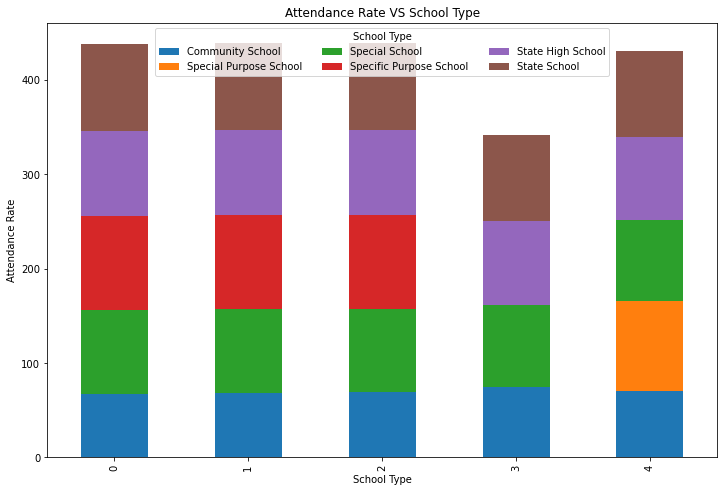

In [27]:


df5.plot(kind="bar",title="Attendance Rate VS School Type",stacked=True,figsize=(12,8)).legend(
    loc='upper center', ncol=3, title="School Type")


plt.xlabel("School Type")
plt.ylabel("Attendance Rate")